# Lending Club Case Study Notebook

## Goal

To minimize the risk of losing money while lending to customers, analyze the existing data to identify the variables that are strong indicators of loan default. 

## Context of Problem

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

## Target

Identify and Reduce risky loan applicants to cut down the amount of credit loss.

### Approach 

#### Step 1: Data Cleaning
#### Step 2: Univariate Analysis
#### Step 3: Segemented Univariate Analysis
#### Step 4: Bivaraiate/Multivariate Analysis
#### Step 5: Results

### Step 1: Data Cleaning

Loading Libraries.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Loading Input Data with configuring appropriate encoding and display setting.

In [ ]:
# Read the raw data. Use the dtype option to remove the warning for mixed types.
pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("whitegrid")
loan_raw = pd.read_csv('../datasets/loan.csv', dtype='unicode')
loan_raw.info(verbose = True, show_counts = True)

Analyze the Input Data.

In [105]:
# Analyze the raw data
print('Number of rows are: ', loan_raw.shape[0])
print('Number of cols are: ', loan_raw.shape[1])
print('Number of duplicated rows are: ', loan_raw.duplicated().sum())

Number of rows are:  39717
Number of cols are:  111
Number of duplicated rows are:  0


Determine the number and names of the columns with all null values. These columns should be dropped from analysis.

In [106]:
# Number of columns with all values being null. These columns need to dropped from the dataframe
all_null_value_cols = [col for col in loan_raw.columns if loan_raw[col].isnull().all() == True]
print('Columns with all null values are:', all_null_value_cols)
print('Number of columns with all null values are: ', len(all_null_value_cols))

Columns with all null values are: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total

In [107]:
# Drop the columns with all null values.
loan_raw.drop(all_null_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all null value columns are:', loan_raw.shape[1])

Number of columns after dropping all null value columns are: 57


Determine the number and names of the columns where null values are more than 50%. These columns should be dropped from analysis

In [108]:
# Number of columns with majority (> 50%) of null values. These columns need to be dropped from the dataframe.
major_null_value_cols = [col for col in loan_raw.columns if loan_raw[col].isnull().sum() / loan_raw.shape[0] * 100 > 50]
print('Columns with more than 50% null values are:', major_null_value_cols)
print('Number of columns with more than 50% null values are: ', len(major_null_value_cols))

Columns with more than 50% null values are: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
Number of columns with more than 50% null values are:  3


In [109]:
# Drop the columns with majority of null values.
loan_raw.drop(major_null_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all columns with more than 50% null values:', loan_raw.shape[1])

Number of columns after dropping all columns with more than 50% null values: 54


Determine the number and names of the columns where there is single value across all the rows. These columns should be dropped from analysis

In [110]:
# Number of columns with single values. These columns need to be dropped from the dataframe.
single_value_cols = [col for col in loan_raw.columns if loan_raw[col].nunique() == 1]
print('Columns with single values are:', single_value_cols)
print('Number of columns with single values are: ', len(single_value_cols))


Columns with single values are: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
Number of columns with single values are:  9


In [111]:
# Drop the columns with single values.
loan_raw.drop(single_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all columns with single values:', loan_raw.shape[1])

Number of columns after dropping all columns with single values: 45


Analyze the columns that contain free textual content as these columns do not help deriving any insight. These columns should be dropped from analysis.

In [112]:
# Drop the `desc` column as it has high value of nulls and is not to be considered for analysis. 
# The field is a textual field and will not help in initial analysis
unwanted_cols = ['desc']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping column with name desc:', loan_raw.shape[1])

Number of columns after dropping column with name desc: 44


In [113]:
# Drop the column zip_code as it is a masked data and cannot be considered for analysis
unwanted_cols = ['zip_code']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping column with name zip_code:', loan_raw.shape[1])

Number of columns after dropping column with name zip_code: 43


Analyze the columns with unique identifiers like id's as these columns do not help deriving any insight. These columns should be dropped from analysis.

In [114]:
# Drop the column containing unique identifiers for each loan entry.
# These field will not help in analysis.
unwanted_cols = ['id', 'member_id', 'url', 'emp_title', 'title']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping columns with name id, member_id, url, emp_title: ', loan_raw.shape[1])

Number of columns after dropping columns with name id, member_id, url, emp_title:  38


Impute the rows where `pub_rec_bankruptcies` is not available with 0. Contextually NaN means 0.

In [115]:
# Impute the NaN rows for `pub_rec_bankruptcies` with 0 as NaN conveys the same information as 0 in this case
loan_raw.pub_rec_bankruptcies.fillna(0, inplace = True)

Drop rows where there is no data for 'emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d'

In [116]:
# Remove rows where 'emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d' has NaN values
loan_raw.dropna(subset=['emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d'], inplace = True)

Standardize Employment length in years to be integer. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [117]:
# Remove year/years as suffix and symbol < as prefix 
loan_raw.emp_length = loan_raw.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0').replace('year','')).astype(int)

Standardize the columns with `%` as in `int_rate` and `revol_until` as columns with float values. This helps in performing mathematical operations over these columns.

In [118]:
# Standardize values in the fields with `%`
loan_raw.int_rate = loan_raw.int_rate.apply(lambda x: float(x.replace('%', '')))
loan_raw.revol_util = loan_raw.revol_util.apply(lambda x: float(x.replace('%', '')))


Standardize columns which participate in numerical analysis to be of float types.

In [119]:
# Convert the `loan_amnt`, `annual_inc`, `dti` to float
loan_raw.loan_amnt = loan_raw.loan_amnt.apply(lambda x: float(x))
loan_raw.annual_inc = loan_raw.annual_inc.apply(lambda x: float(x))
loan_raw.dti = loan_raw.dti.apply(lambda x: float(x))
loan_raw.total_pymnt = loan_raw.total_pymnt.apply(lambda x: float(x))
loan_raw.total_rec_prncp = loan_raw.total_rec_prncp.apply(lambda x: float(x))
loan_raw.total_rec_int = loan_raw.total_rec_int.apply(lambda x: float(x))

Standardize columns which participate in categorical analysis to be of category types.

In [120]:
loan_raw.purpose = loan_raw.purpose.astype('category')
loan_raw.home_ownership = loan_raw.home_ownership.astype('category')
loan_raw.verification_status = loan_raw.verification_status.astype('category')
loan_raw.term = loan_raw.term.astype('category')
loan_raw.grade = loan_raw.grade.astype('category')
loan_raw.sub_grade = loan_raw.sub_grade.astype('category')
loan_raw.addr_state = loan_raw.addr_state.astype('category')

Standardize columns with date context to be of standard date time format and extract year and months.

In [121]:
loan_raw.issue_d = pd.to_datetime(loan_raw.issue_d,format='%b-%y')
loan_raw['issue_year'] = pd.to_datetime(loan_raw.issue_d,format='%b-%y').dt.year
loan_raw['issue_month'] = pd.to_datetime(loan_raw.issue_d,format='%b-%y').dt.month

In [122]:
loan_raw['prncp_recovery_ratio'] = loan_raw.total_rec_prncp / loan_raw.loan_amnt * 100
loan_raw['int_recovery_ratio'] = loan_raw.total_rec_int / loan_raw.loan_amnt * 100
loan_raw['loan_status_category'] = loan_raw.total_rec_int.apply(lambda x: 1 if x == "Fully Paid" else 0)

Remove data where the `loan_status` is not Current as this data pertains to ongoing loans and hence with indeterministic last state.

In [ ]:
# Studying the pattern of loans defaulted can only be done by comparing completed and defaulted loans.
loan_raw = loan_raw[loan_raw.loan_status != "Current"]
loan_raw.loan_status.value_counts

Function to remove outliers from a given column from the given dataframe. 

The function removes the rows from the dataframe where the values from the target columns are beyond the higher/lower fence for that column.

In [124]:
def remove_outlier(input_df, col_name):
    q1 = input_df[col_name].quantile(0.25)
    q3 = input_df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)
    
    before_count = len(input_df)
    output_df = input_df.loc[(input_df[col_name] > fence_low) & (input_df[col_name] < fence_high)]
    after_count = len(output_df)
    
    num_entries_removed = before_count - after_count
    return output_df, num_entries_removed

Remove outliers from `loan_amnt`, `int_rate`, `annual_inc` and `dti` columns. Use the `remove_outlier` method declared above to remove the outliers.

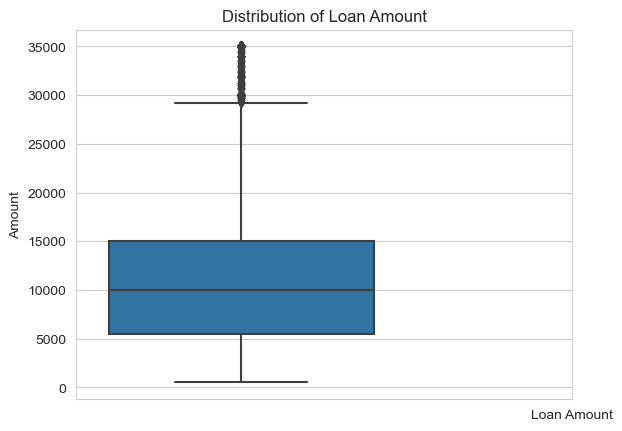

In [125]:
# Distribution of the `loan_amnt` column before outlier removal
sns.boxplot([loan_raw.loan_amnt])
plt.title('Distribution of Loan Amount')
plt.ylabel('Amount')
plt.xticks([1],['Loan Amount'])
plt.show()

In [126]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'loan_amnt')
print('Number of outliers removed for loan_amnt:', num_entries_removed)

Number of outliers removed for loan_amnt: 1076


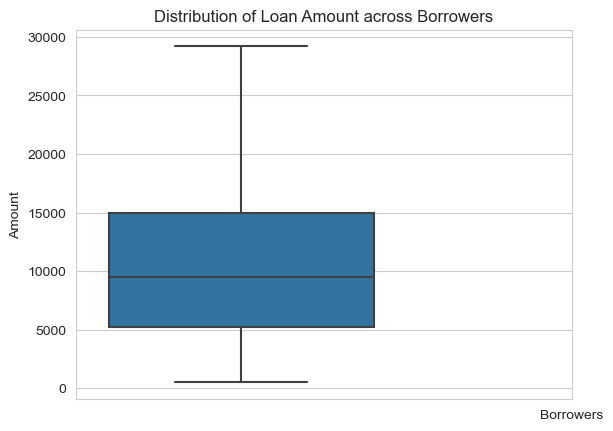

In [127]:
# Distribution of the `loan_amnt` column after outlier removal
sns.boxplot([loan_raw.loan_amnt])
plt.title('Distribution of Loan Amount across Borrowers')
plt.ylabel('Amount')
plt.xticks([1],['Borrowers'])
plt.show()

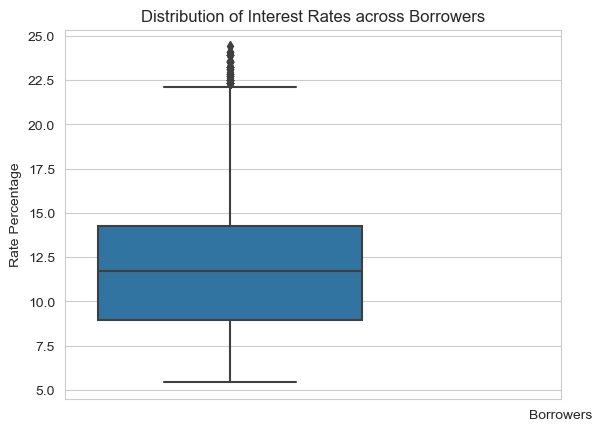

In [128]:
sns.boxplot([loan_raw.int_rate])
plt.title('Distribution of Interest Rates across Borrowers')
plt.ylabel('Rate Percentage')
plt.xticks([1],['Borrowers'])
plt.show()

In [129]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'int_rate')
print('Number of outliers removed for int_rate:', num_entries_removed)

Number of outliers removed for int_rate: 66


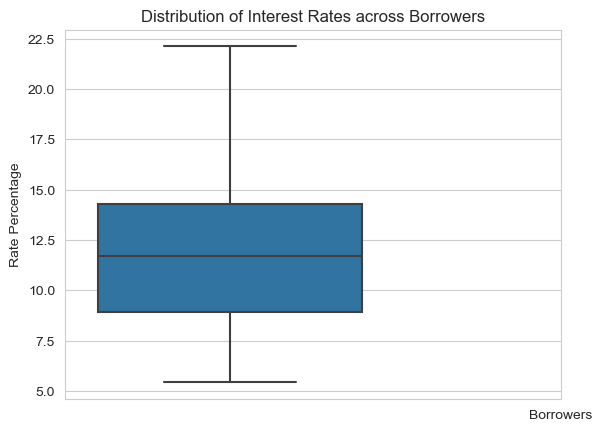

In [130]:
sns.boxplot([loan_raw.int_rate])
plt.title('Distribution of Interest Rates across Borrowers')
plt.ylabel('Rate Percentage')
plt.xticks([1],['Borrowers'])
plt.show()

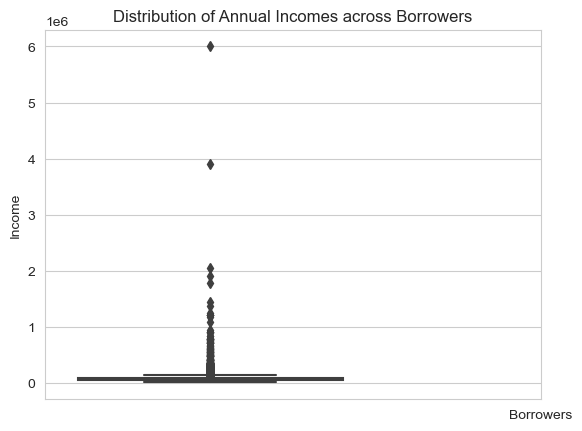

In [131]:
sns.boxplot([loan_raw.annual_inc])
plt.title('Distribution of Annual Incomes across Borrowers')
plt.ylabel('Income')
plt.xticks([1],['Borrowers'])
plt.show()

In [132]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'annual_inc')
print('Number of outliers removed for annual_inc:', num_entries_removed)

Number of outliers removed for annual_inc: 1781


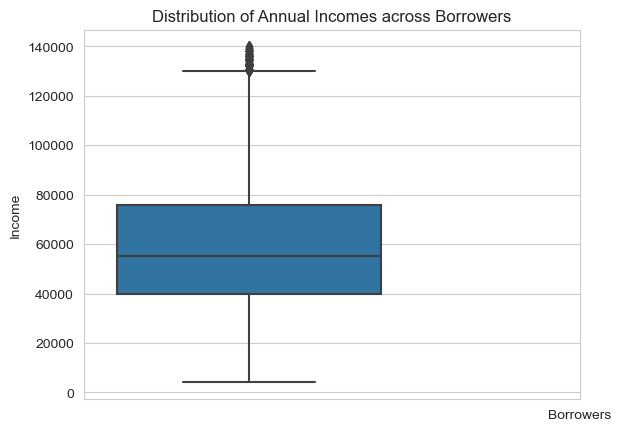

In [133]:
sns.boxplot([loan_raw.annual_inc])
plt.title('Distribution of Annual Incomes across Borrowers')
plt.ylabel('Income')
plt.xticks([1],['Borrowers'])
plt.show()

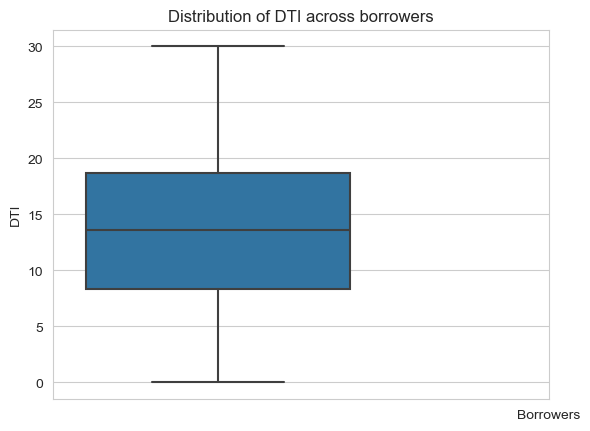

In [134]:
sns.boxplot([loan_raw.dti])
plt.title('Distribution of DTI across borrowers')
plt.ylabel('DTI')
plt.xticks([1],['Borrowers'])
plt.show()

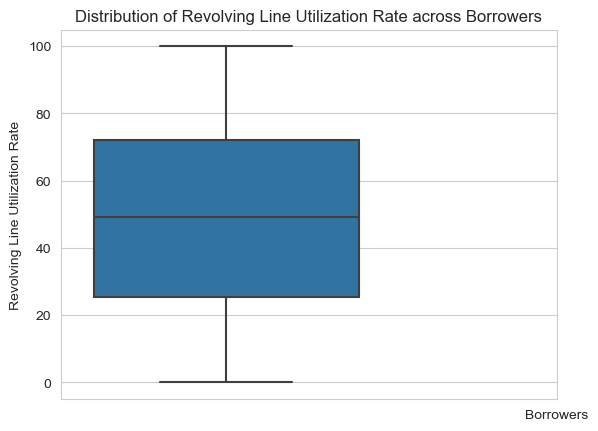

In [135]:
# Distribution of the `revolving line utilization rate` before outlier removal
sns.boxplot([loan_raw.revol_util])
plt.title('Distribution of Revolving Line Utilization Rate across Borrowers')
plt.ylabel('Revolving Line Utilization Rate')
plt.xticks([1],['Borrowers'])
plt.show()

In [136]:
loan_raw['loan_amnt_range'] = pd.cut(loan_raw['loan_amnt'], bins=6, precision=0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])
loan_raw['int_rate_range'] = pd.cut(loan_raw['int_rate'], bins=5,precision=0,labels=['0-5','5-10','10-15','15-20','20-25'])
loan_raw['dti_range'] = pd.cut(loan_raw['dti'], bins=6, precision=0, labels=['0-5','5-10','10-15','15-20','20-25', '25-30'])
loan_raw['revol_util_range'] = pd.cut(loan_raw['revol_util'], bins=10, precision=0, labels=['0-10','10-20','20-30','30-40','40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
loan_raw['annual_inc_range'] = pd.cut(loan_raw['annual_inc'], bins=6, precision=0, labels=['0-25k','25k-50k','50k-75k','75k-100k','100k-125k', '125k-150k'])
loan_raw['prncp_recovery_ratio_range'] = pd.cut(loan_raw['prncp_recovery_ratio'], bins=10, precision=0, labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [192]:
loan_raw.shape

(34510, 49)

### Step 2: Univariate Analysis

loan_status
Fully Paid     85.914228
Charged Off    14.085772
Name: count, dtype: float64


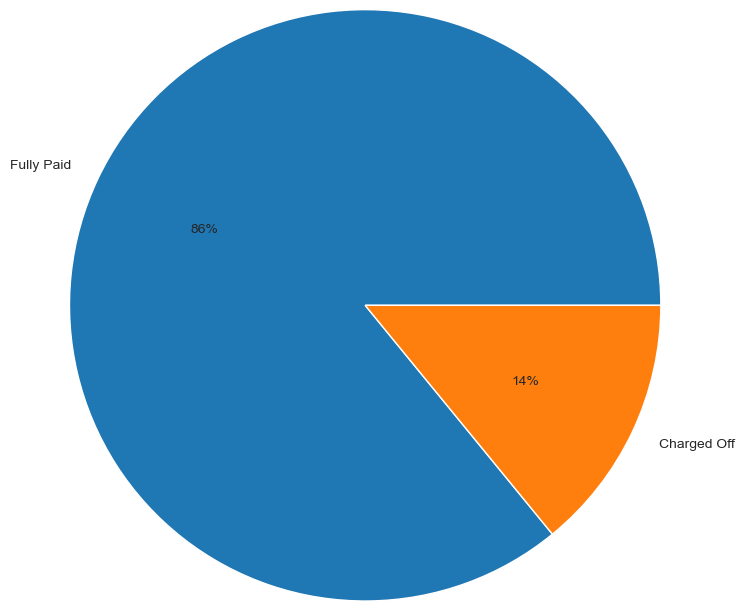

In [137]:
loan_status_distribution = loan_raw.loan_status.value_counts()
print( loan_status_distribution / loan_raw.shape[0] * 100)
plt.pie(loan_status_distribution,labels = loan_status_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: There are around **15%** of the loans getting defaulted.

prncp_recovery_ratio_range
10-20     18.226702
20-30     15.799218
0-10      15.099774
30-40     11.561407
40-50     10.861963
50-60      9.709936
60-70      7.488171
70-80      5.307550
80-90      3.929233
90-100     2.016046
Name: count, dtype: float64


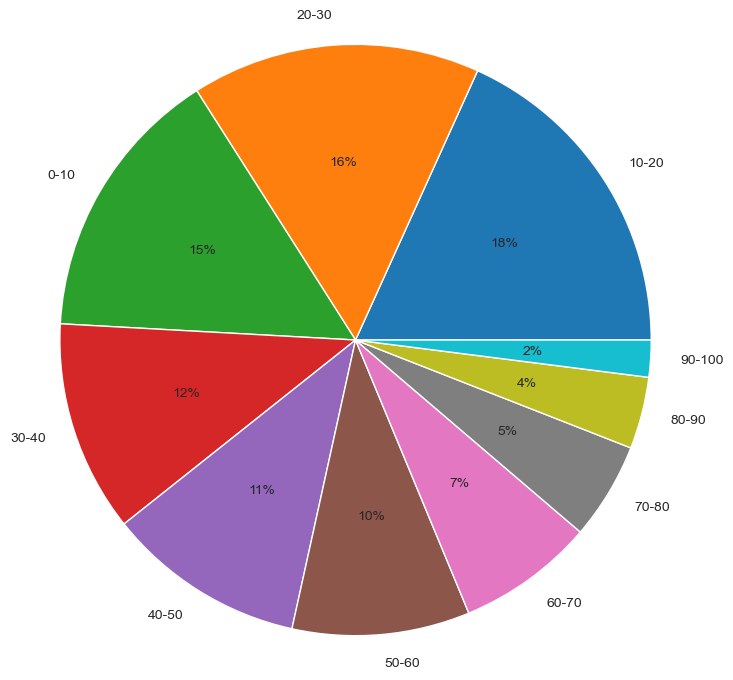

In [190]:
prncp_recovery_ratio_range_distribution = loan_raw[loan_raw.loan_status == 'Charged Off'].prncp_recovery_ratio_range.value_counts()
print( prncp_recovery_ratio_range_distribution / loan_raw[loan_raw.loan_status == 'Charged Off'].shape[0] * 100)
plt.pie(prncp_recovery_ratio_range_distribution,labels = prncp_recovery_ratio_range_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

In [139]:
charged_off_loan_percentage = round(loan_raw[loan_raw.loan_status == 'Charged Off'].shape[0] / loan_raw.shape[0] * 100, 2)

In [140]:
def analyze_variable_distribution_across_category(variable_name, 
                                                  category_type, 
                                                  category_baseline, 
                                                  chart_x_label, 
                                                  chart_y_label, 
                                                  chart_title, 
                                                  baseline_color = 'red',
                                                  chart_kind = 'bar'):
    """
        Parameters:
            variable_name : categorical variable to be analyzed
            category_type : hue against which the variable is to be analyzed 
            category_baseline : value of the baseline for the numerical variable
            chart_x_label : label of the x-axis
            chart_y_label : label of the y-axis
            chart_title : title of the chart
            baseline_color : color of the baseline, defaulting to red
            chart_kind : kind of the chart, defaulting to bar
        Returns:
            None, shows the plot
    """
    figsize = (12, 12)
    groupedby_variablename = loan_raw[[variable_name,category_type]].groupby(variable_name)[category_type].value_counts(normalize = True).mul(100).unstack()
    ax = groupedby_variablename.plot(kind = chart_kind, stacked = True, figsize = figsize)

    ax.set_xlabel(chart_x_label)
    ax.set_ylabel(chart_y_label)
    ax.set_title(chart_title)

    ax.axhline(y = category_baseline, color = baseline_color)
    plt.show()

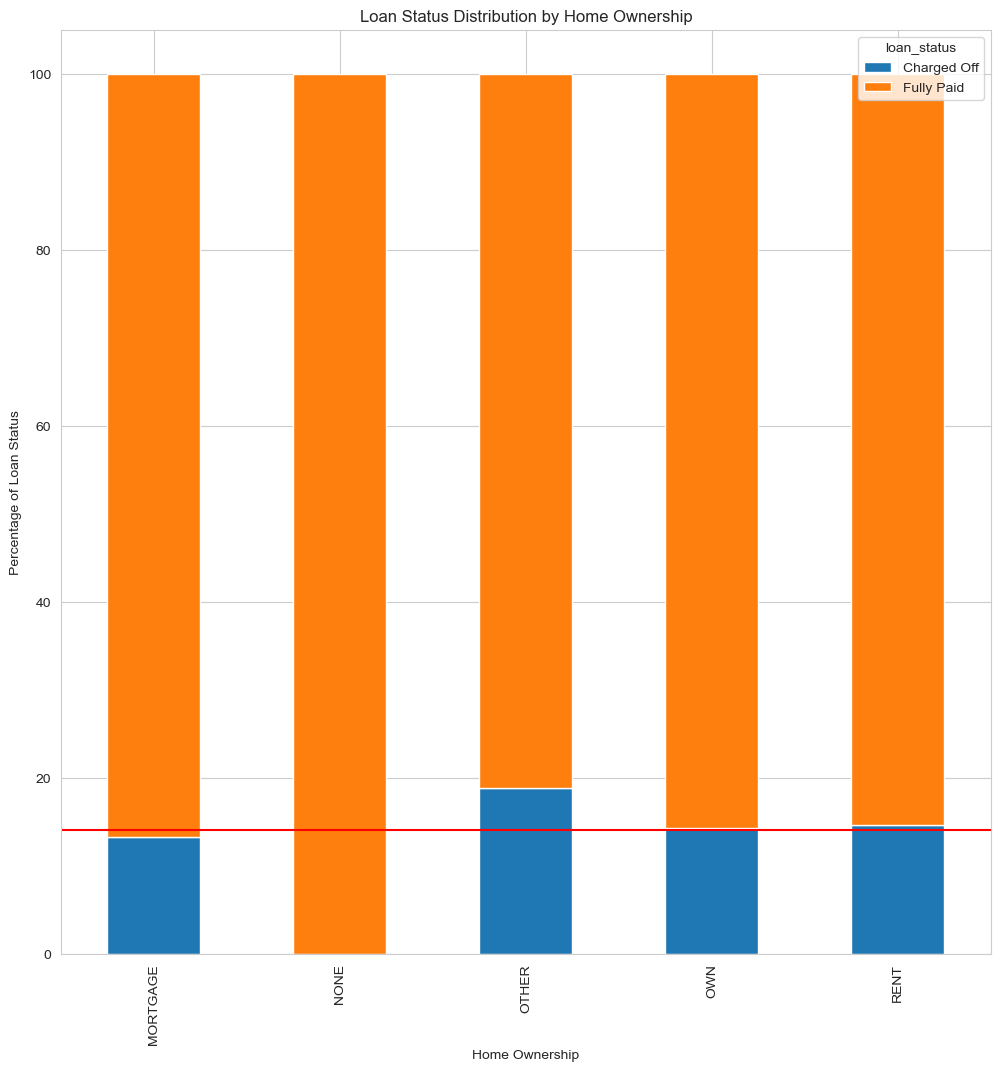

In [141]:
analyze_variable_distribution_across_category('home_ownership', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Home Ownership', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Home Ownership')

Inference: In the **OTHER** catgory, the ratio of borrowers with "Charged Off" loan status exceeds the overall ratio of "Charged Off" borrowers. 

Hence, the probability of defaulting is more when the "Home Ownership" category is "OTHER".

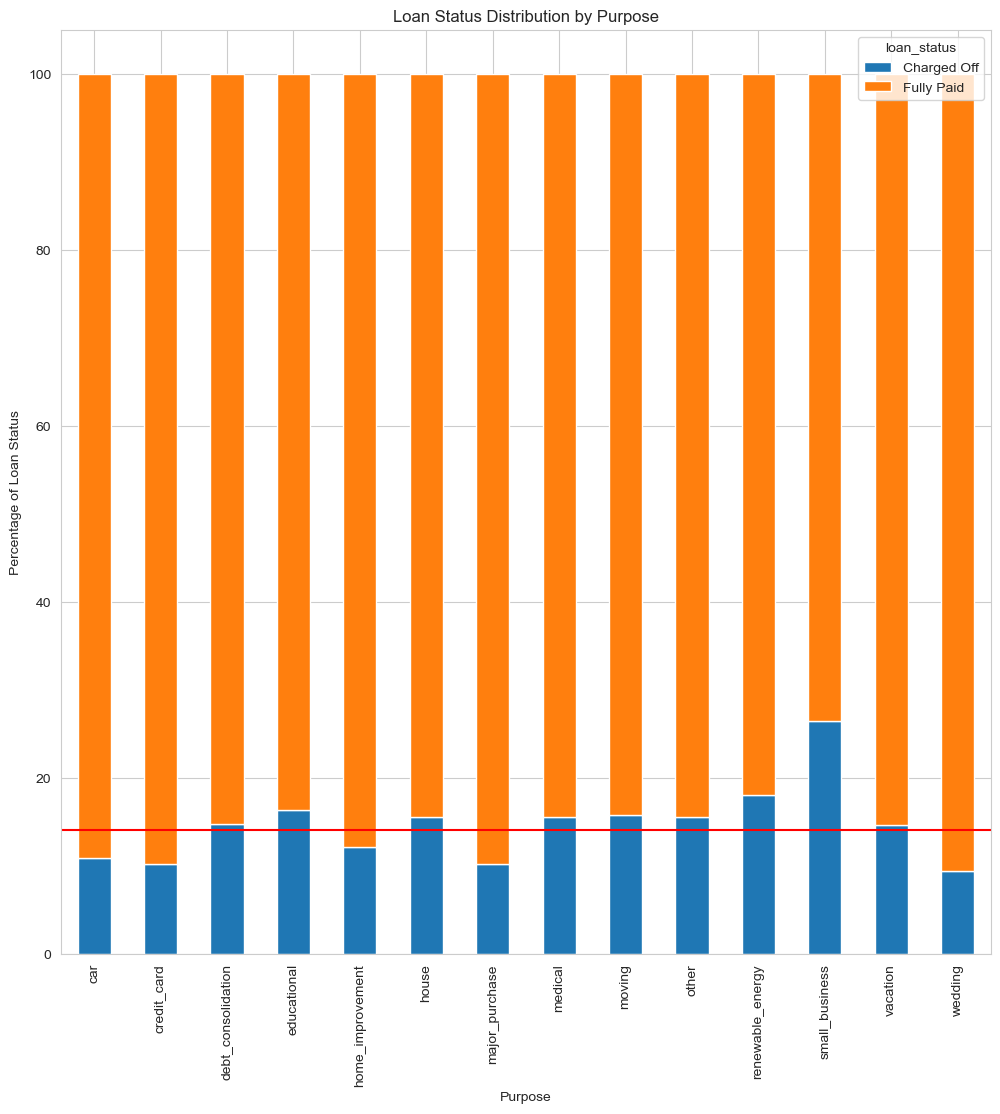

In [142]:
analyze_variable_distribution_across_category('purpose', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Purpose', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Purpose')

Inference: In the **small_business** and **renewable** catgory, the ratio of borrowers with "Charged Off" loan status exceeds the overall ratio of "Charged Off" borrowers. 

Hence, the probability of defaulting is more when the Purpose is "small_business" or "renewable".

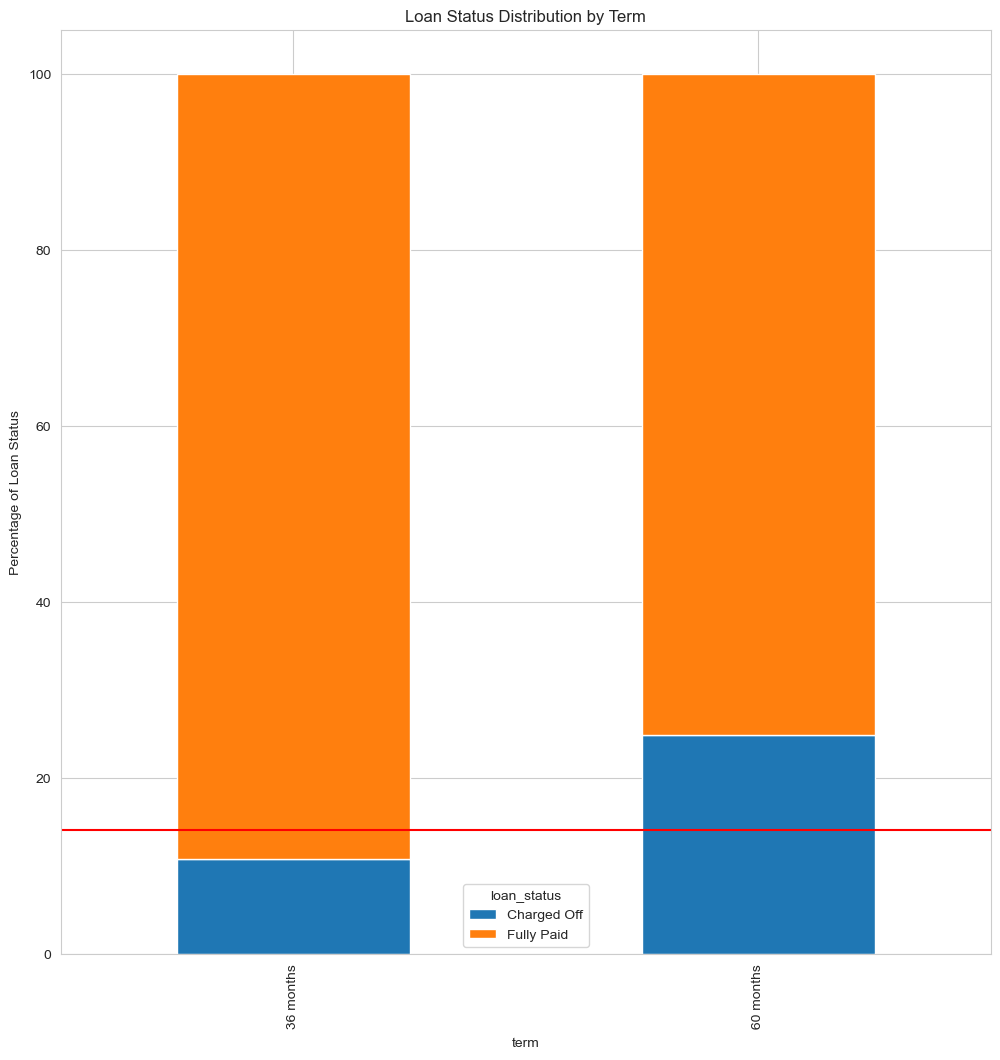

In [143]:
analyze_variable_distribution_across_category('term', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'term', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Term')

Inference: In the **60months** catgory, the ratio of borrowers with "Charged Off" loan status exceeds the overall ratio of "Charged Off" borrowers. 

Hence, the probability of defaulting is more when the Term is "60 months".

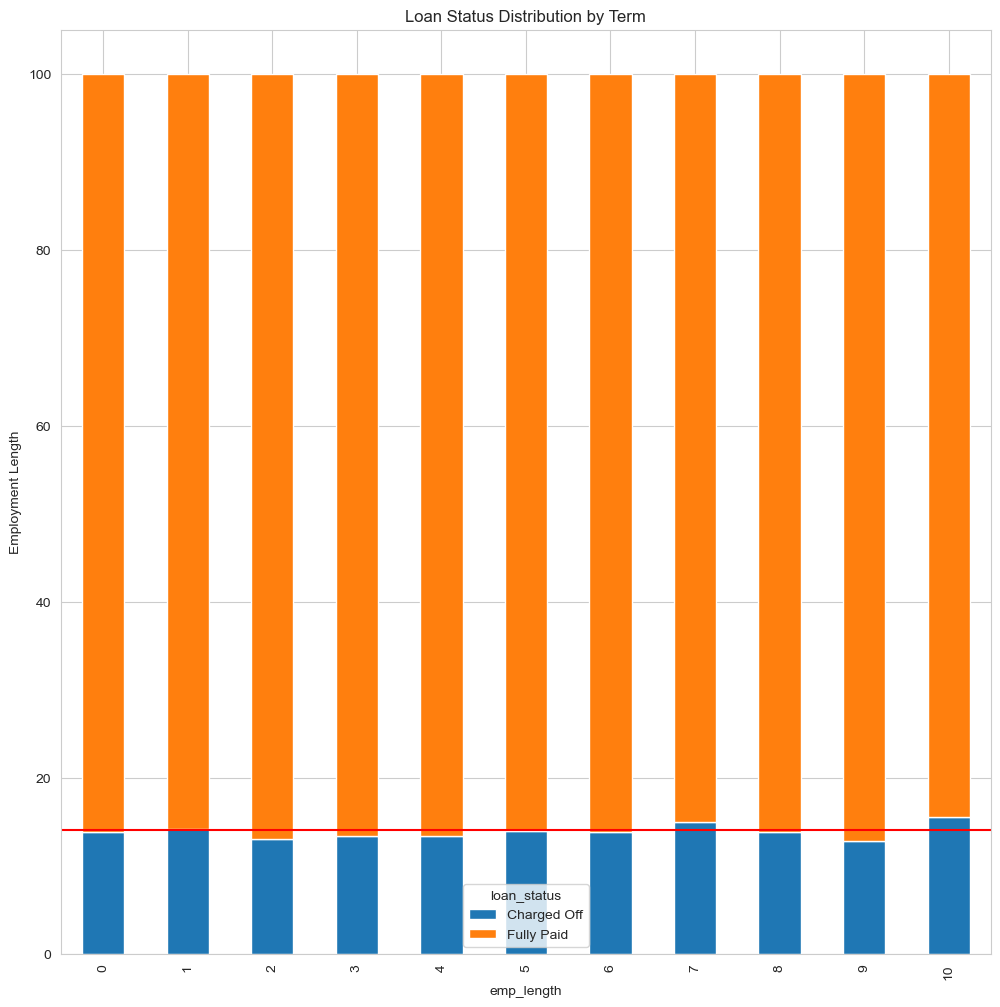

In [144]:
analyze_variable_distribution_across_category('emp_length', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'emp_length', 
                                              'Employment Length', 
                                              'Loan Status Distribution by Term')

Inference: There is not much impact of Employment Length on defaulting.

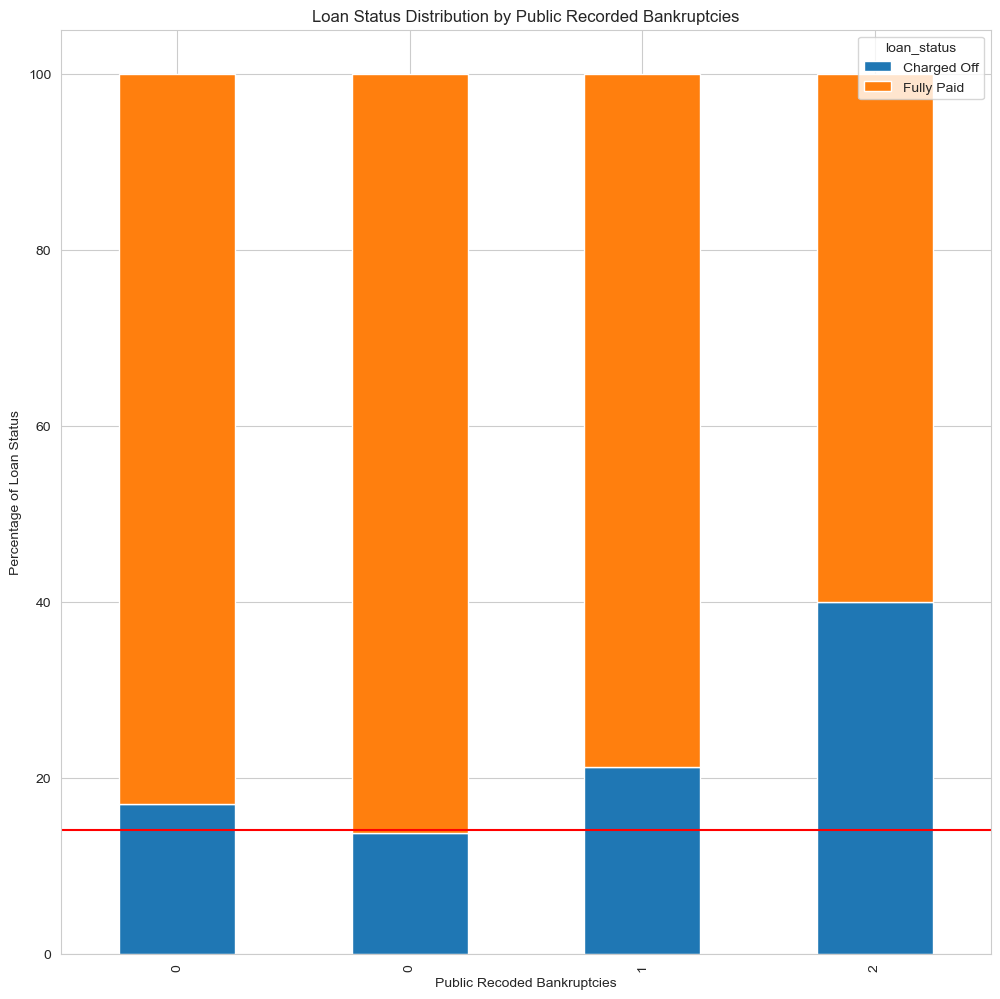

In [145]:
analyze_variable_distribution_across_category('pub_rec_bankruptcies', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Public Recoded Bankruptcies', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Public Recorded Bankruptcies')

Inference: Clearly, when there are **>0** occurances of **Public Recorded Bankruptcies**, the probability of defaulting increases.

This is clear by the chart that shows that borrowers who have declared **1** or **2** banruptcies tends to default more often.

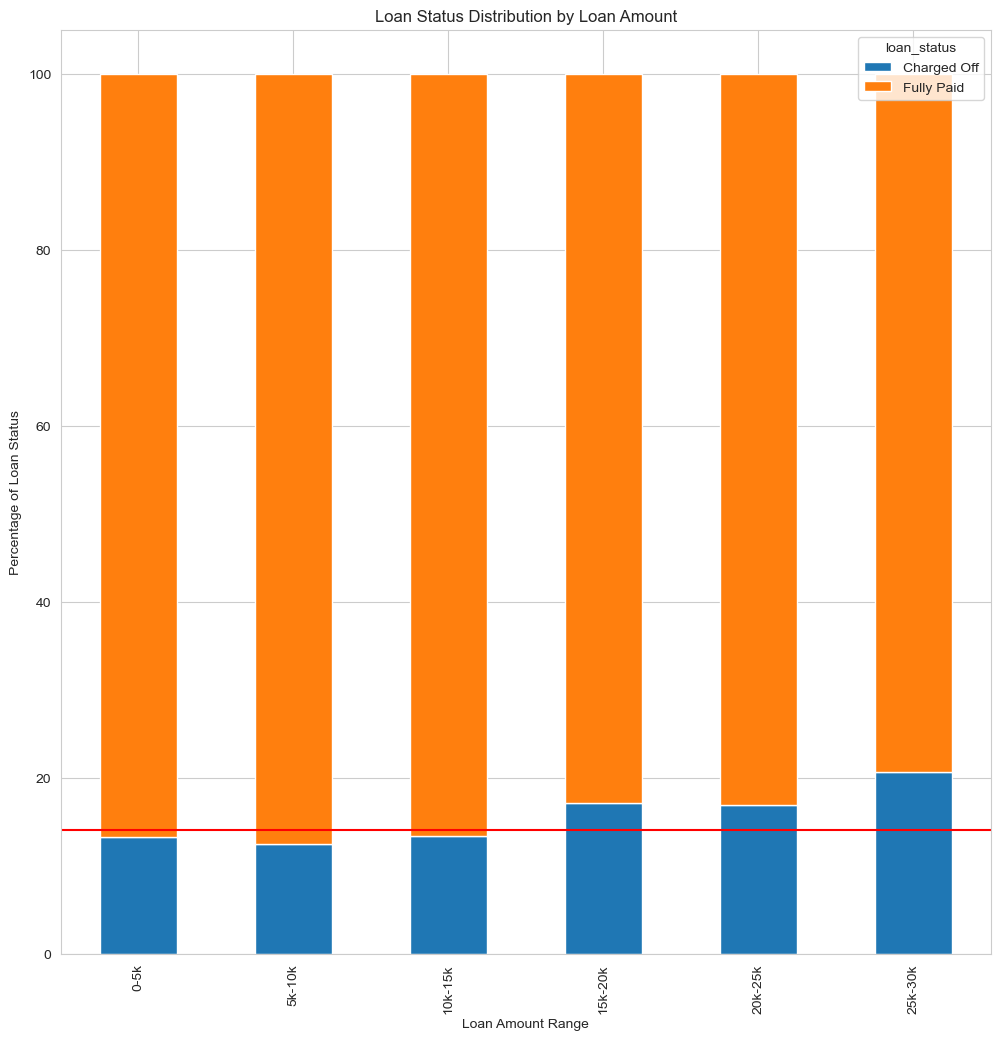

In [146]:
analyze_variable_distribution_across_category('loan_amnt_range', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Loan Amount Range', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Loan Amount')

Inference: Clearly, the probability of defaulting increases with the increasing Loan Amount.

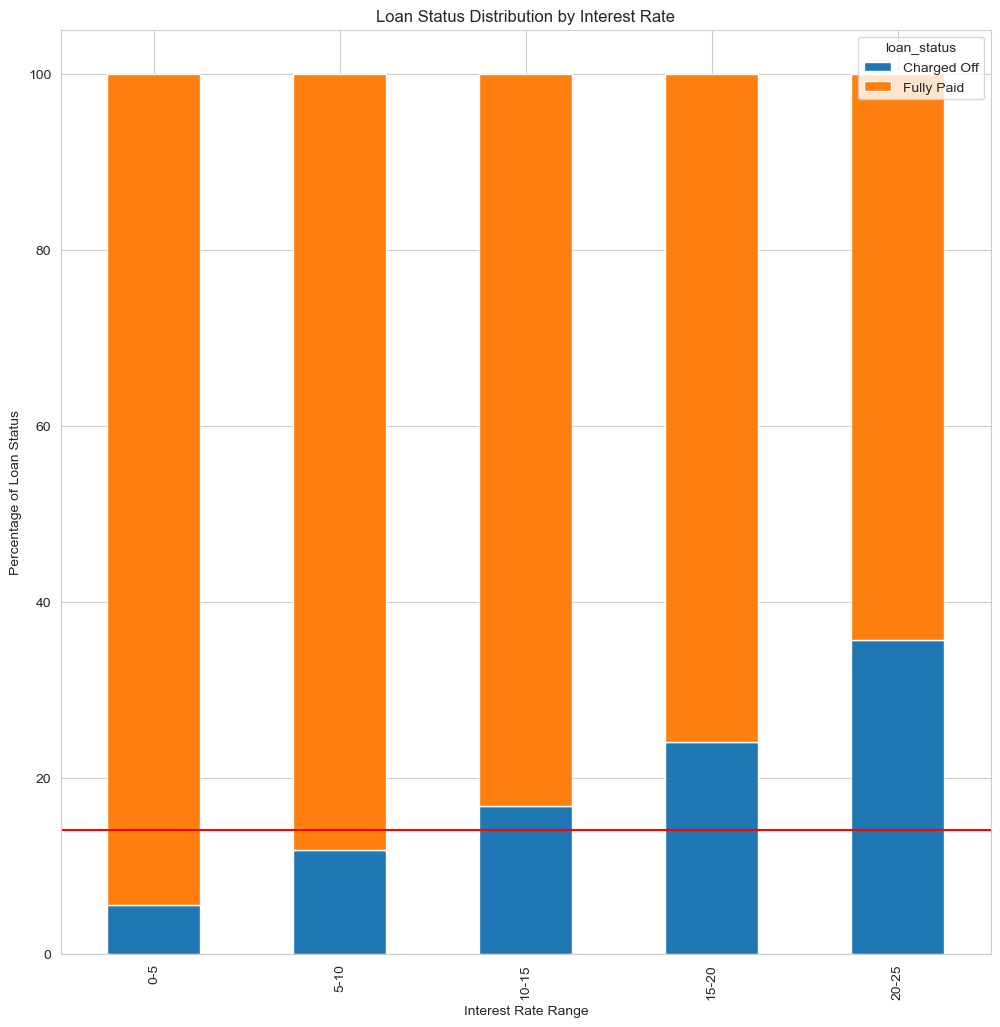

In [147]:
analyze_variable_distribution_across_category('int_rate_range', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Interest Rate Range', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Interest Rate')

Inference: A clear indication where the probability of defaulting increses with the increase in interest rate.

Also, the chart shows that when the interst rate is **< 10 %** the proabability of defaulting decreases.

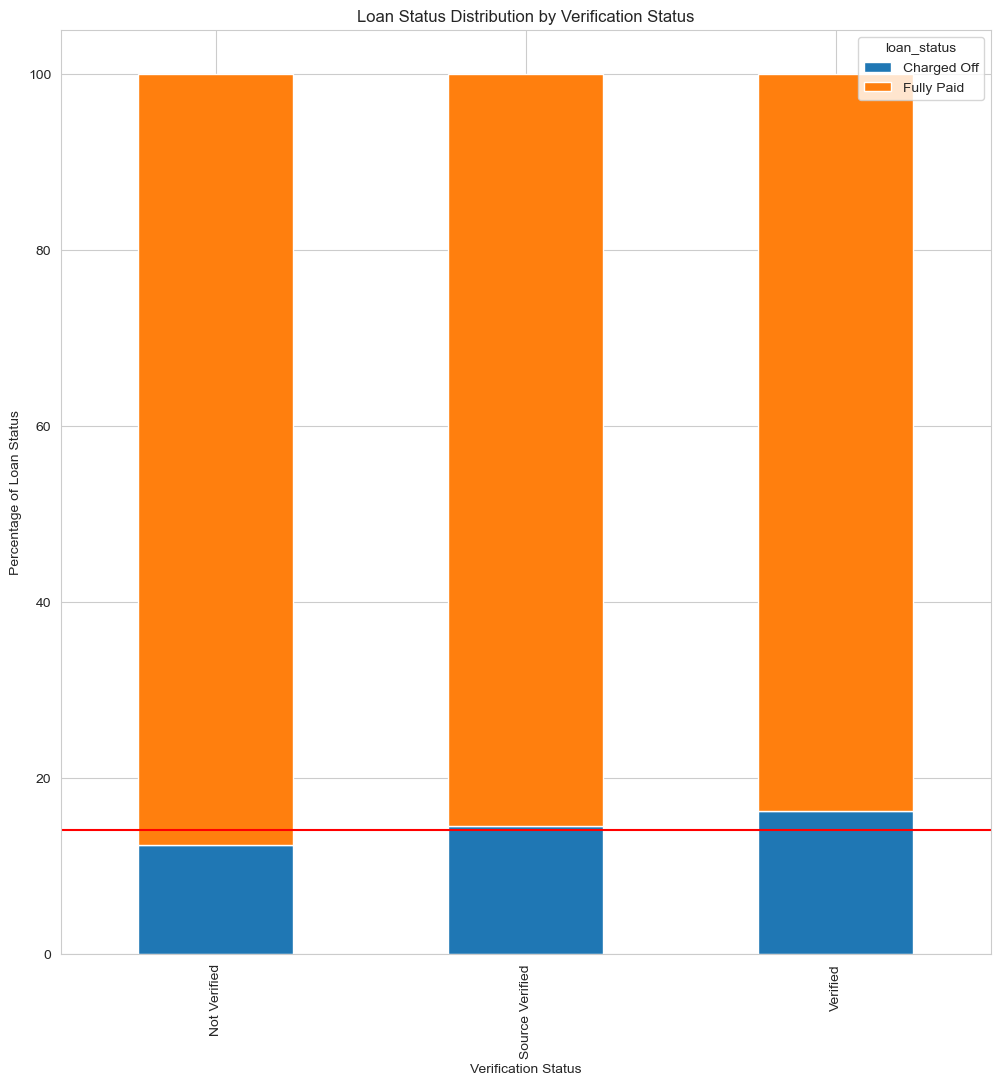

In [148]:
analyze_variable_distribution_across_category('verification_status', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Verification Status', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Verification Status')

Inference: In both **Source Verified** and **Verified** categories, the proportion of defaulting borrowers follows the same pattern as overall defaulting borrowers.

This indicates verification of borrower's verification as no effect on defaulting.

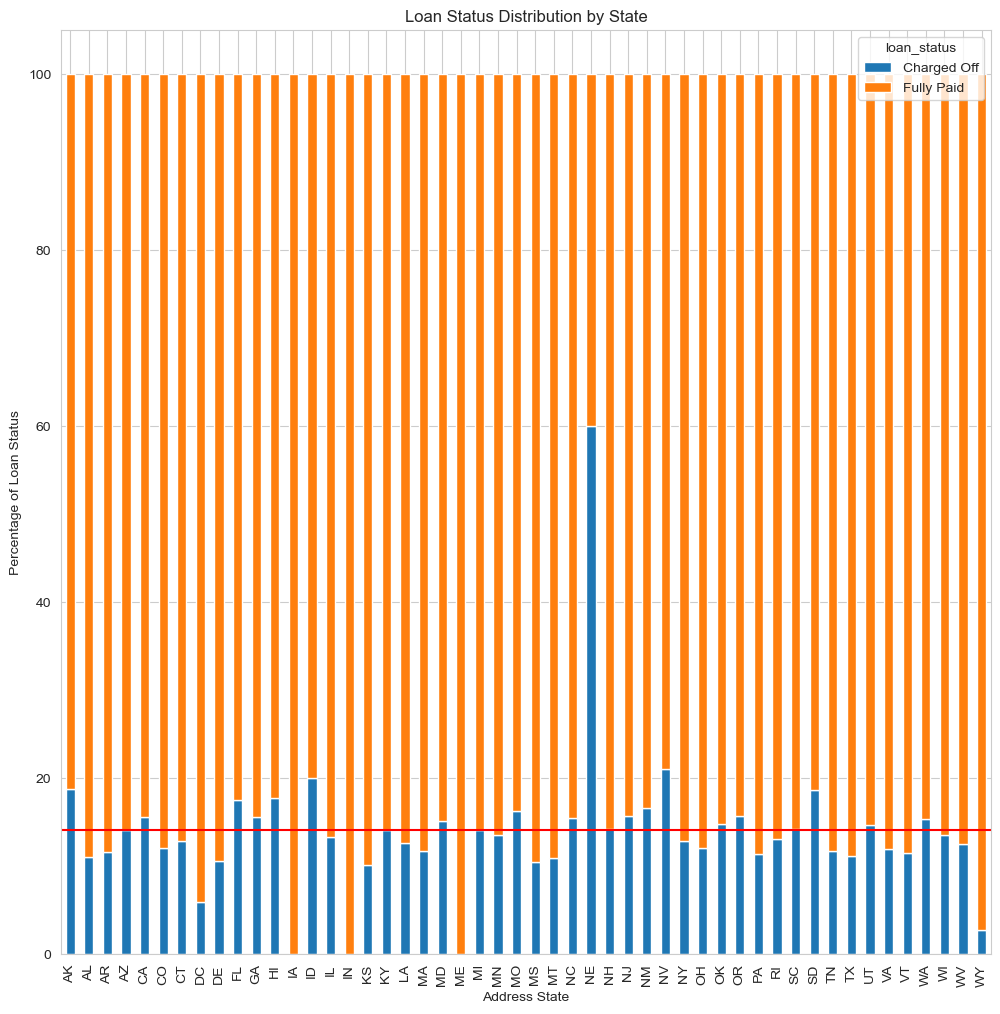

In [149]:
analyze_variable_distribution_across_category('addr_state', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Address State', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by State')

Inference: 
- States with **higher** probability of borrower defaulting
    - NE
- States with **lower** probability of borrower defaulting
    - IA
    - IN
    - ME
    - WY

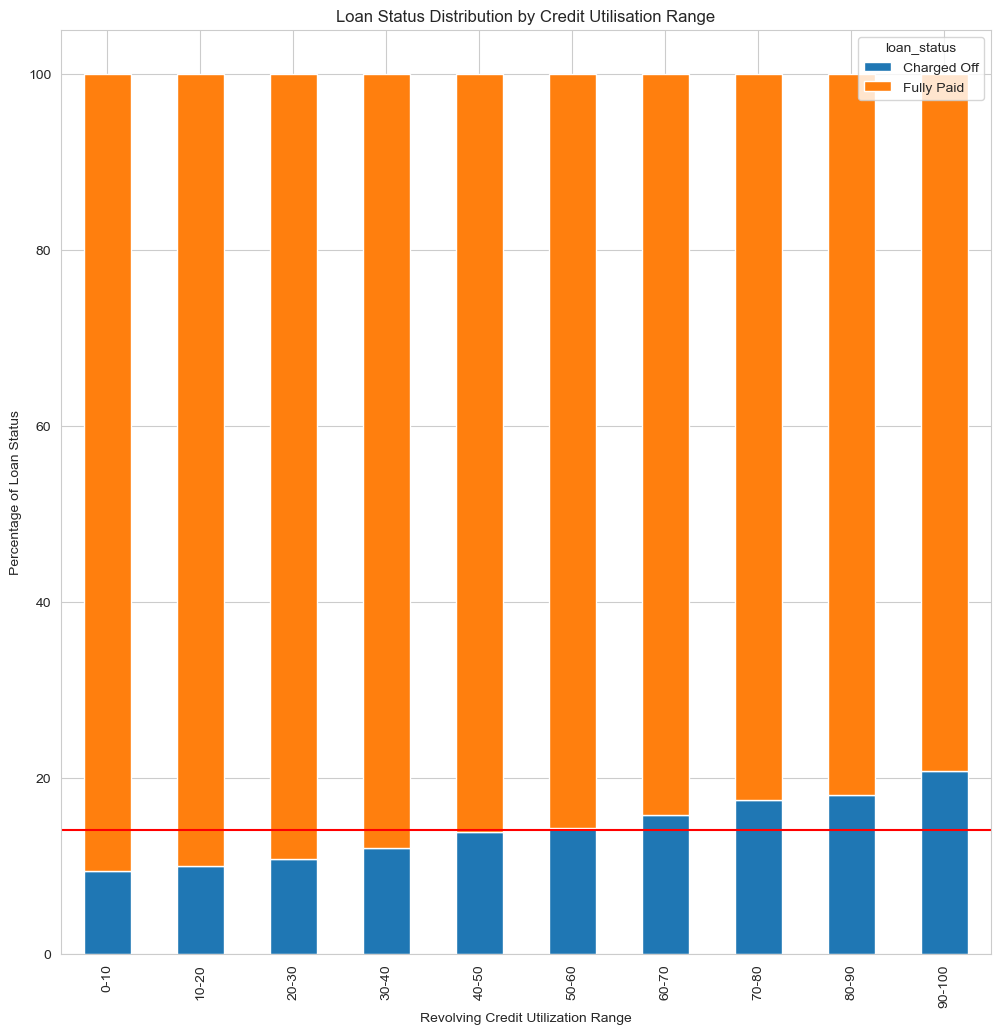

In [150]:
analyze_variable_distribution_across_category('revol_util_range', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Revolving Credit Utilization Range', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Credit Utilisation Range')

Inference: A clear indication where the probability of defaulting increses with the increase in revolving credit utilization rate.

Also, the chart shows that when the utilization rate is **< 50 %** the proabability of defaulting decreases.

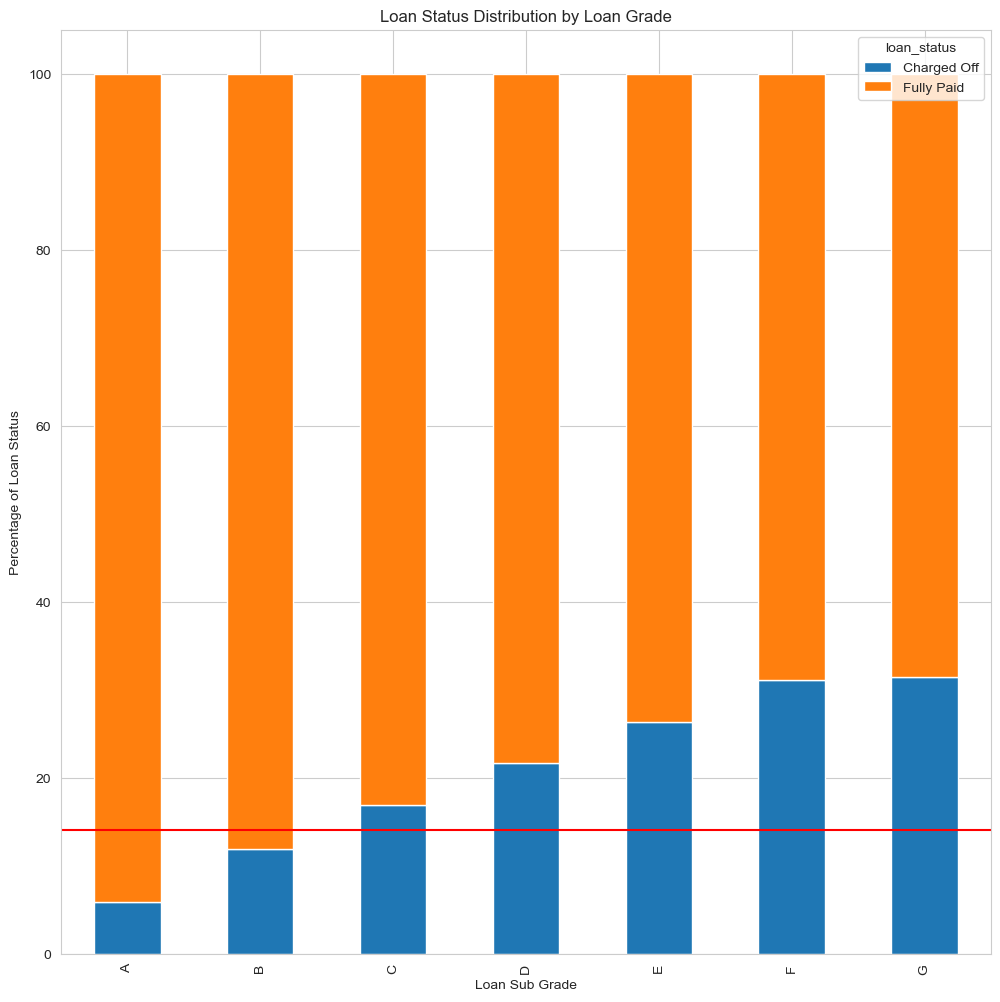

In [191]:
analyze_variable_distribution_across_category('grade', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Loan Sub Grade', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Loan Grade')

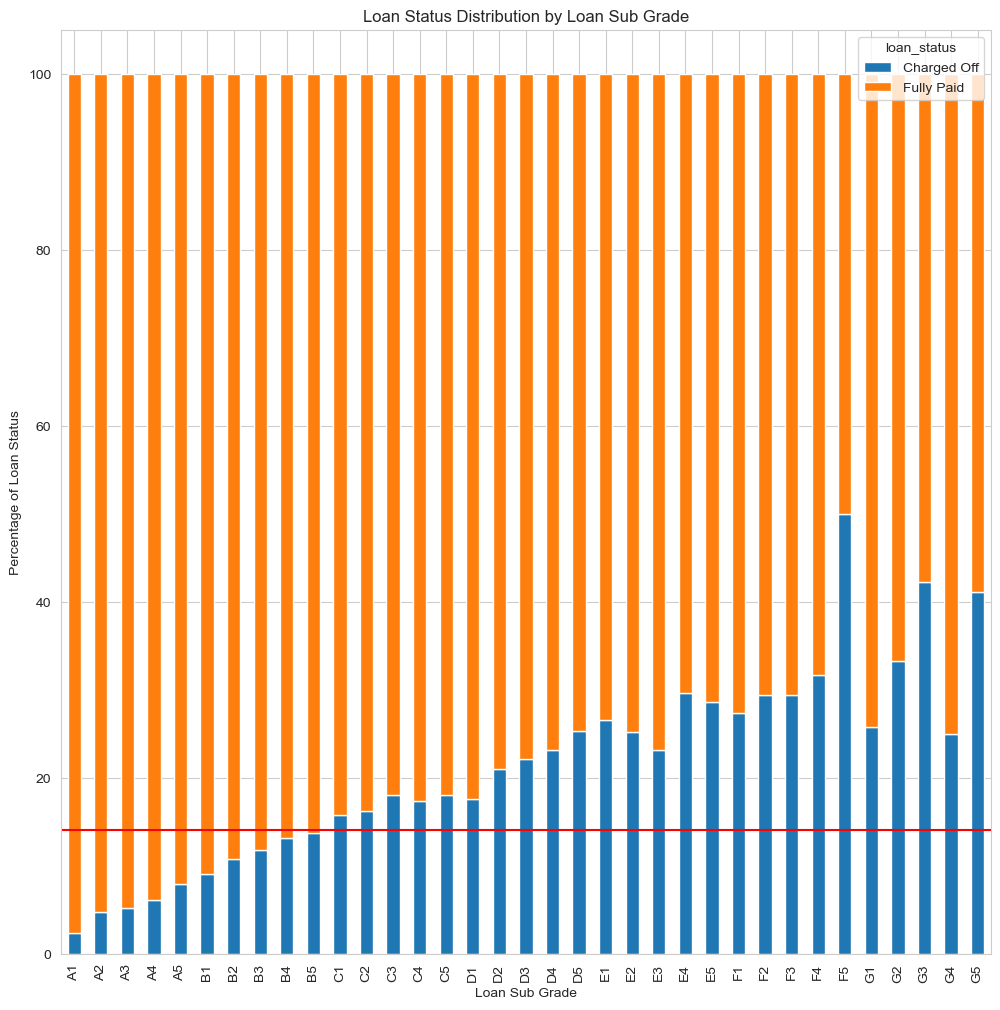

In [198]:
analyze_variable_distribution_across_category('sub_grade', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Loan Sub Grade', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Loan Sub Grade')

Inference: 
- Loans where probability of defaulting is higher for subgrades:
    - D
    - E
    - F
    - G
- Loans where probability of defaulting is lower for subgrades:
    - A

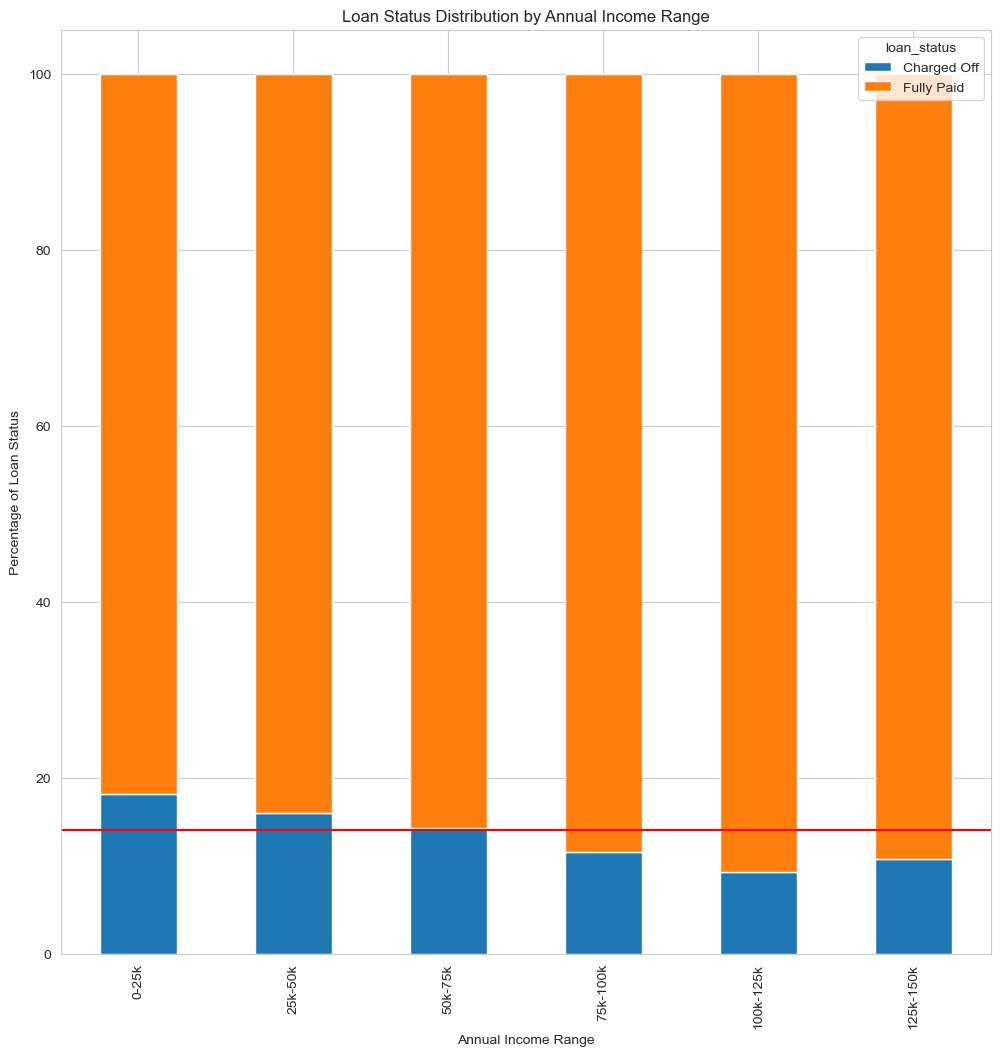

In [152]:
analyze_variable_distribution_across_category('annual_inc_range', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Annual Income Range', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Annual Income Range')

Inference: 
- Clearly, the occurances of defaulting decreses with the increase in Annual Income

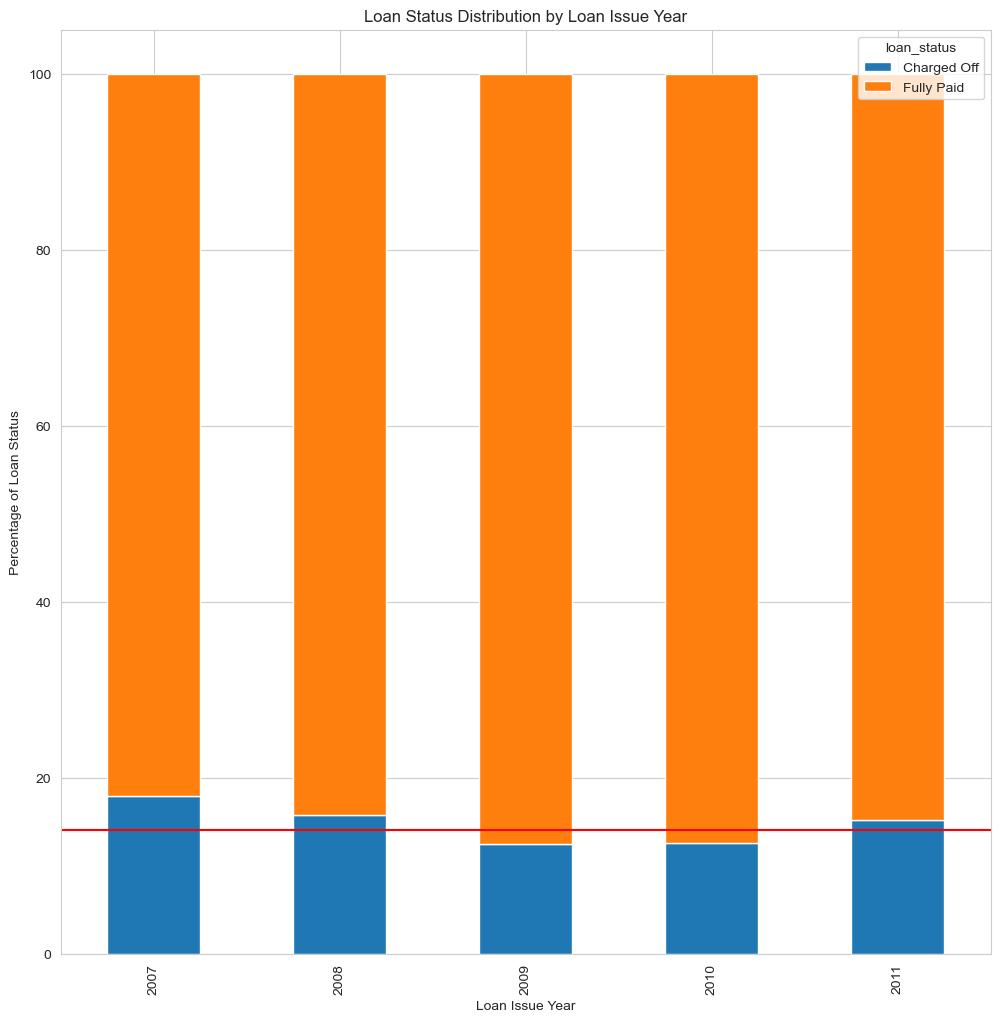

In [186]:
analyze_variable_distribution_across_category('issue_year', 
                                              'loan_status', 
                                              charged_off_loan_percentage, 
                                              'Loan Issue Year', 
                                              'Percentage of Loan Status', 
                                              'Loan Status Distribution by Loan Issue Year')

Inference: 
- While **Loan Issue Year ~ 2007** seem to have a slightly higher percentage of Loan Default, there doesn't seem to be any major impact of Loan Issue Year on loan defaulting.

In [162]:
def bivariate_analysis(data, values, indexes, columns):
    """
        Parameters:
            data : input data frame
            values : numerical variable to be analyzed across 2 categorical variables
            indexes : y-axis categorical variable
            columns : x-axis categorical variable
        Returns:
            None, shows the plot
    """
    fig, ax = plt.subplots(figsize=(12,12))
    pt = pd.pivot_table(data = data, values = values, index = indexes, columns = columns)
    sns.heatmap(pt, ax = ax, cmap ='RdYlGn')
    plt.show()

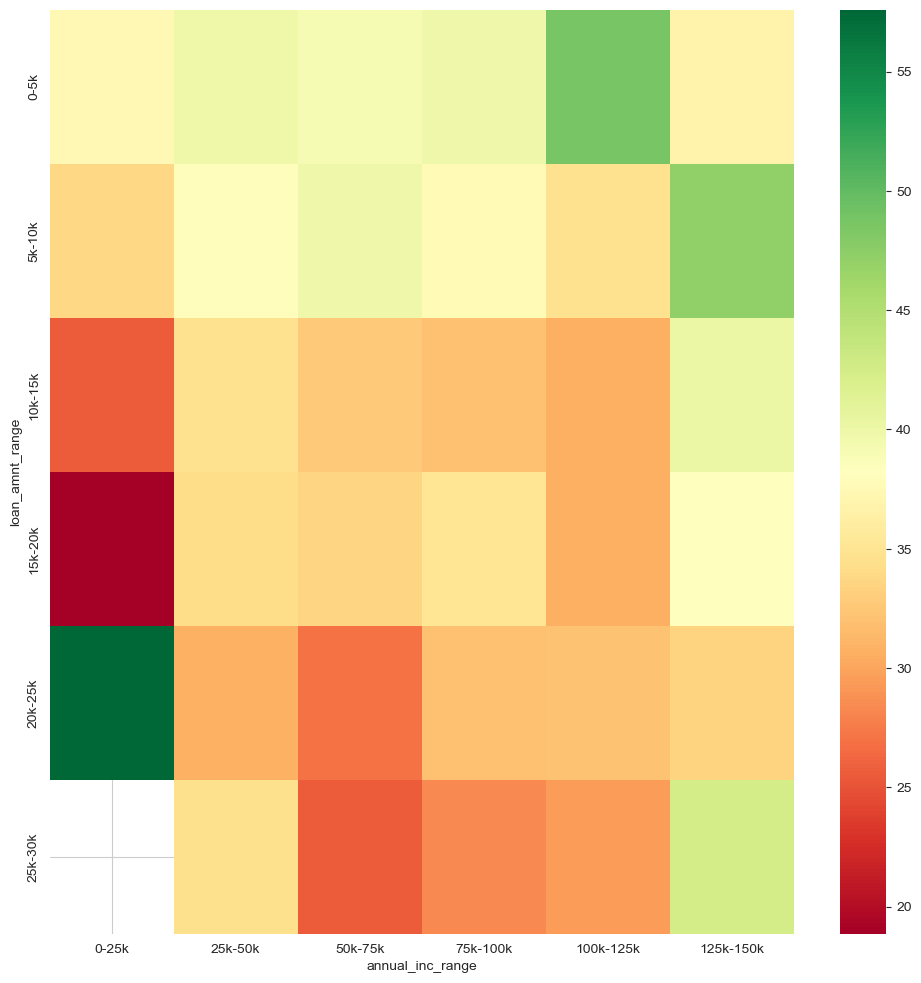

In [173]:
# Analysing effect of Loan Amount and Annual Income on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'loan_amnt_range', 'annual_inc_range')

Inference:
- In general, for all the income groups, the PRR shows a decrease with increasing loan amount
- However, for the lowest income group **Annual Income < 25000**, the PRR decreases with the increase in Loan Amount, the least being for **Loan Amount ~ 15-20k** range. The exceptionally high PRR for **Loan Amount ~ 20-25k** seems to be an outlier.

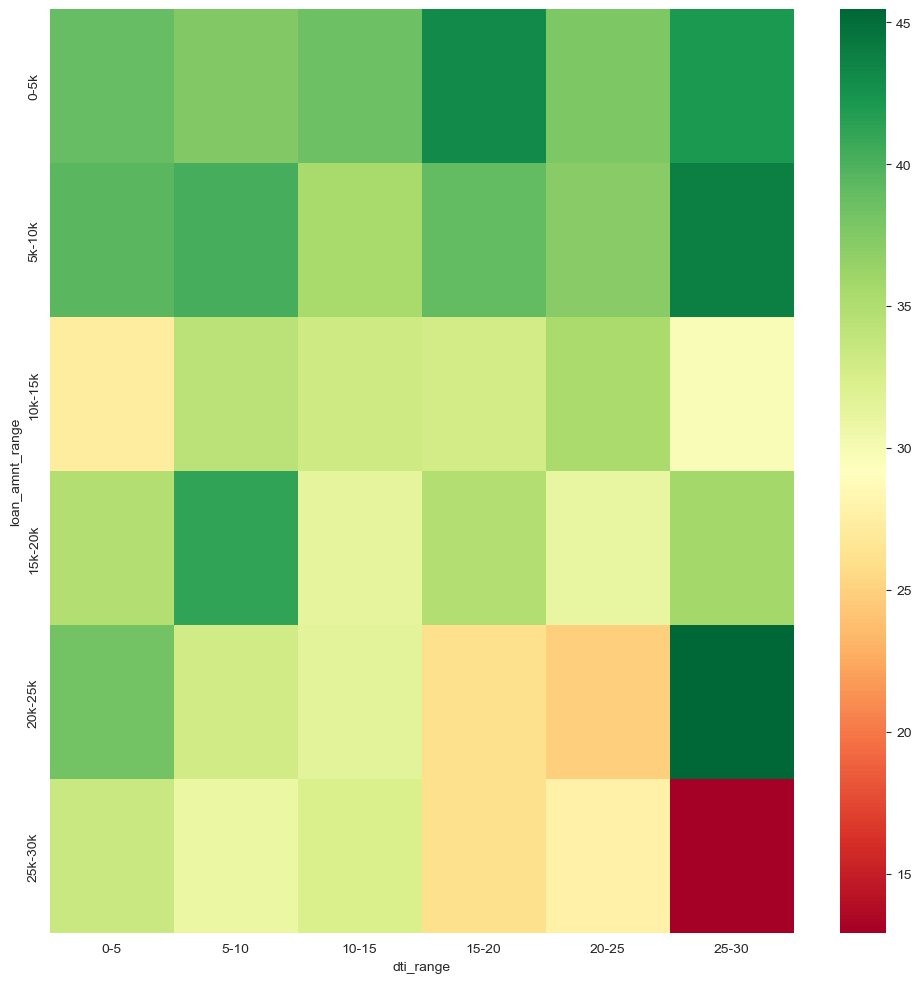

In [184]:
# Analysing effect of Loan Amount and DTI on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'loan_amnt_range', 'dti_range')

Inference:
- The PRR seems to be dropping below 15% for loans with **Loan Amount ~ 25k - 30k** and **DTI ~ 25 - 30**

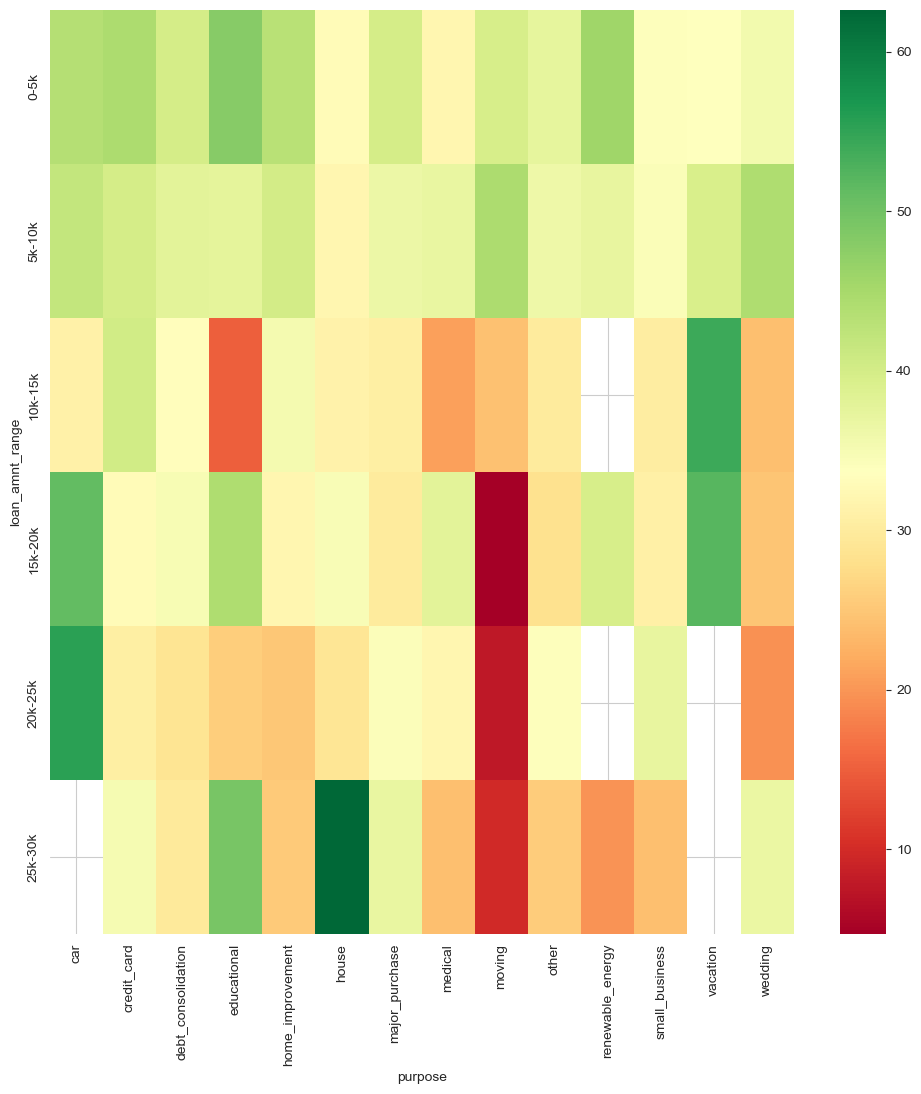

In [170]:
# Analysing effect of Loan Amount and Purpose on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'loan_amnt_range', 'purpose')

Inference:
- Amonst all the categories, **moving** cateogry seems to show exceptionally low PRR's for **Loan Amount ~ 15k**

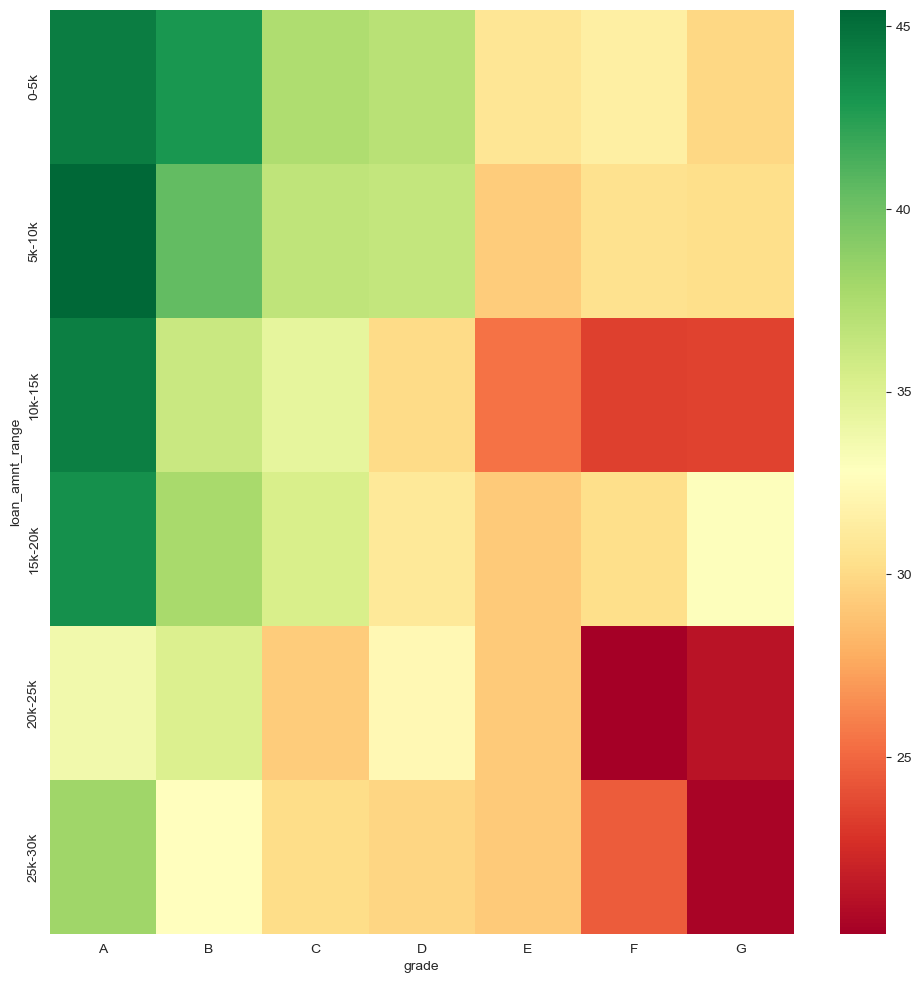

In [171]:
# Analysing effect of Loan Amount and Grade on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'loan_amnt_range', 'grade')

Inference:
- **Loan Grade - F and G** tends to affect PRR the most.
    - For **Loan Amount > 20k**, the PRR drops below **25%** for **Loan Grade - F and G** 

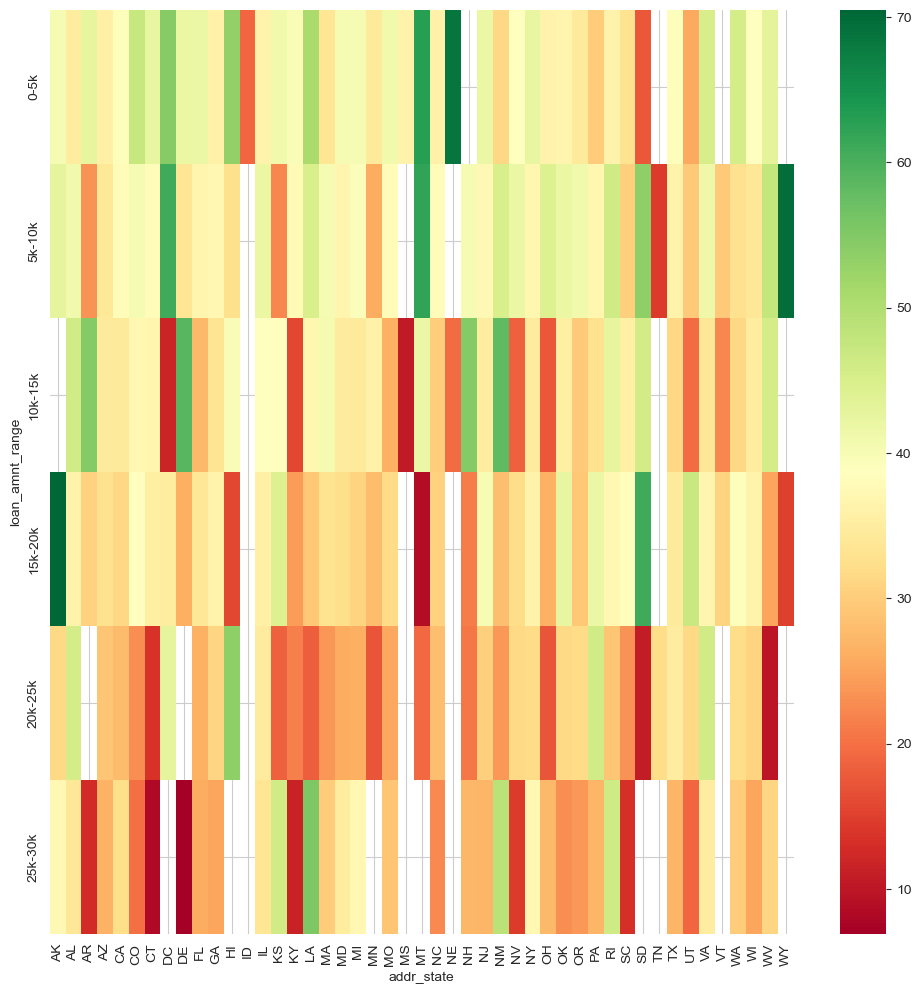

In [176]:
# Analysing effect of Loan Amount and Address State on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'loan_amnt_range', 'addr_state')

Inference:
- For **Loan Amount 25k-30k**, states with least PRR: **CT, DE**
- For **Loan Amount 20k-25k**, states with least PRR: **WV**
- For **Loan Amount 15k-20k**, states with least PRR: **MT**
- For **Loan Amount 10k-15k**, states with least PRR: **MS, DC**

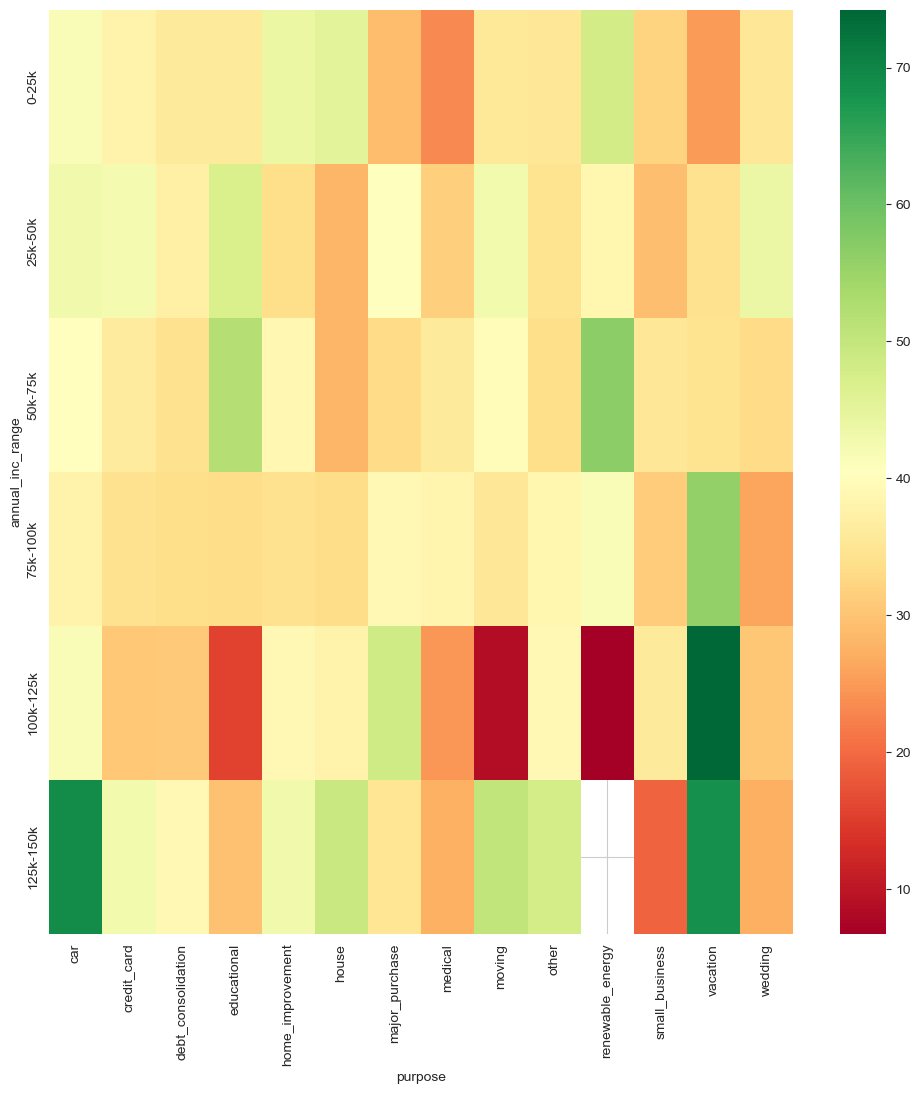

In [177]:
# Analysing effect of Annual Income and Purpose on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'annual_inc_range', 'purpose')

Inference:
- Loan Borrowers with **Annual Income ~ 100k-125k**, taking loan with the purpose of **moving and renewable energy** seems to have **PRR < 10%**

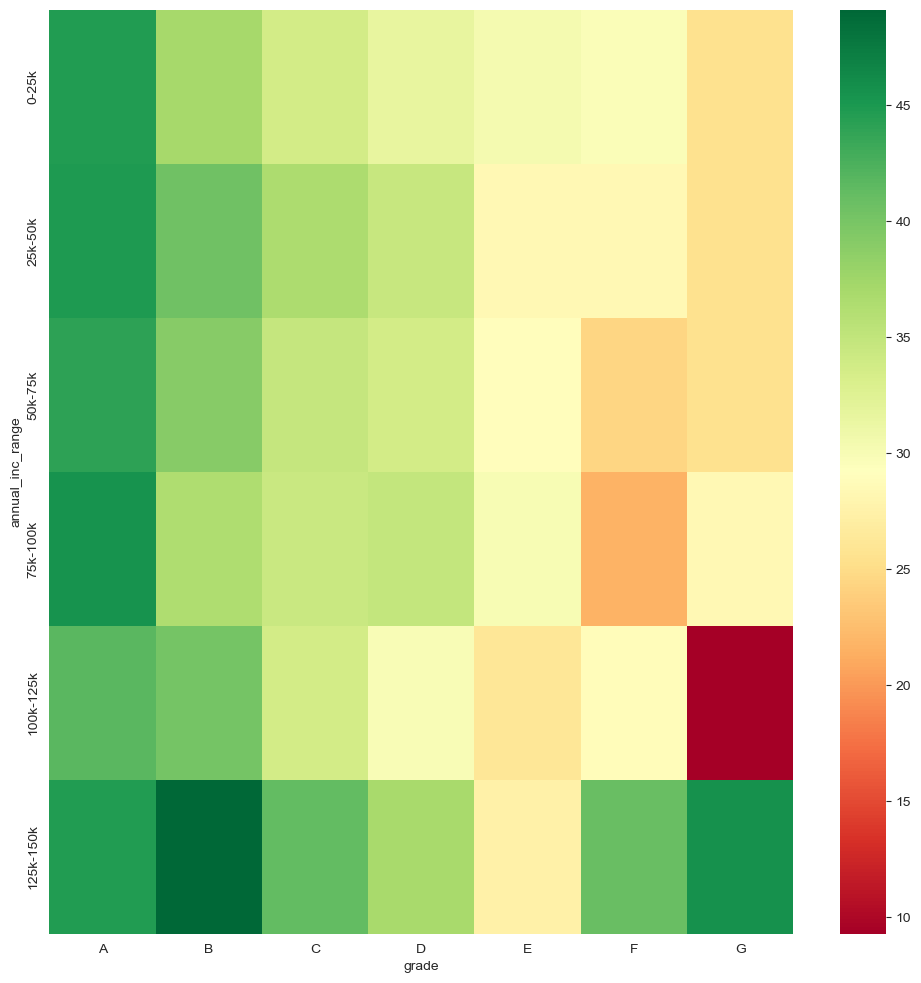

In [178]:
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'annual_inc_range', 'grade')

Inference:
- Loan Borrowers with **Annual Income ~ 100k-125k**, taking loan with the **Loan Grade ~ G** seems to have **PRR < 10%**

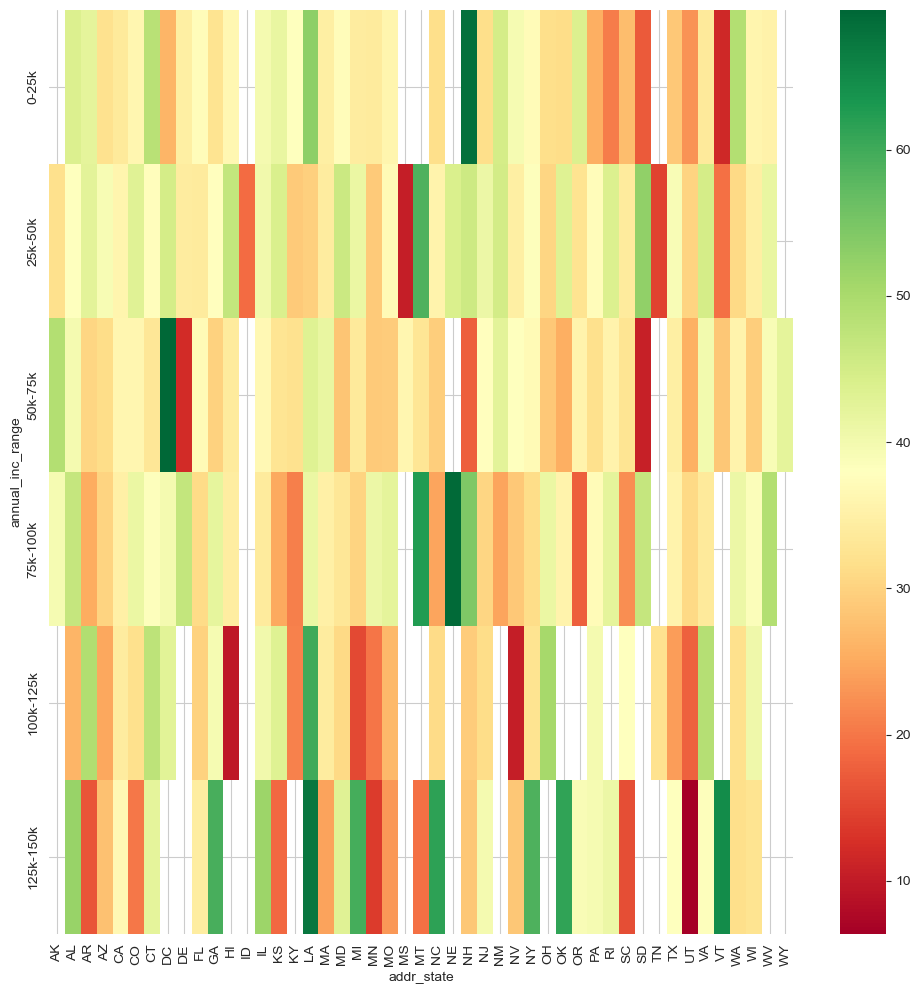

In [180]:
# Analysing effect of Annual Income and Address State on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'annual_inc_range', 'addr_state')


Inference:
- For **Annual Income 125k-150k**, states with least PRR: **UT**
- For **Annual Income 100-125k**, states with least PRR: **HI,NV**
- For **Annual Income 50k-75k**, states with least PRR: **DE, SD**
- For **Annual Income 25k-50k**, states with least PRR: **MS**
- For **Annual Income 0k-25k**, states with least PRR: **VT**

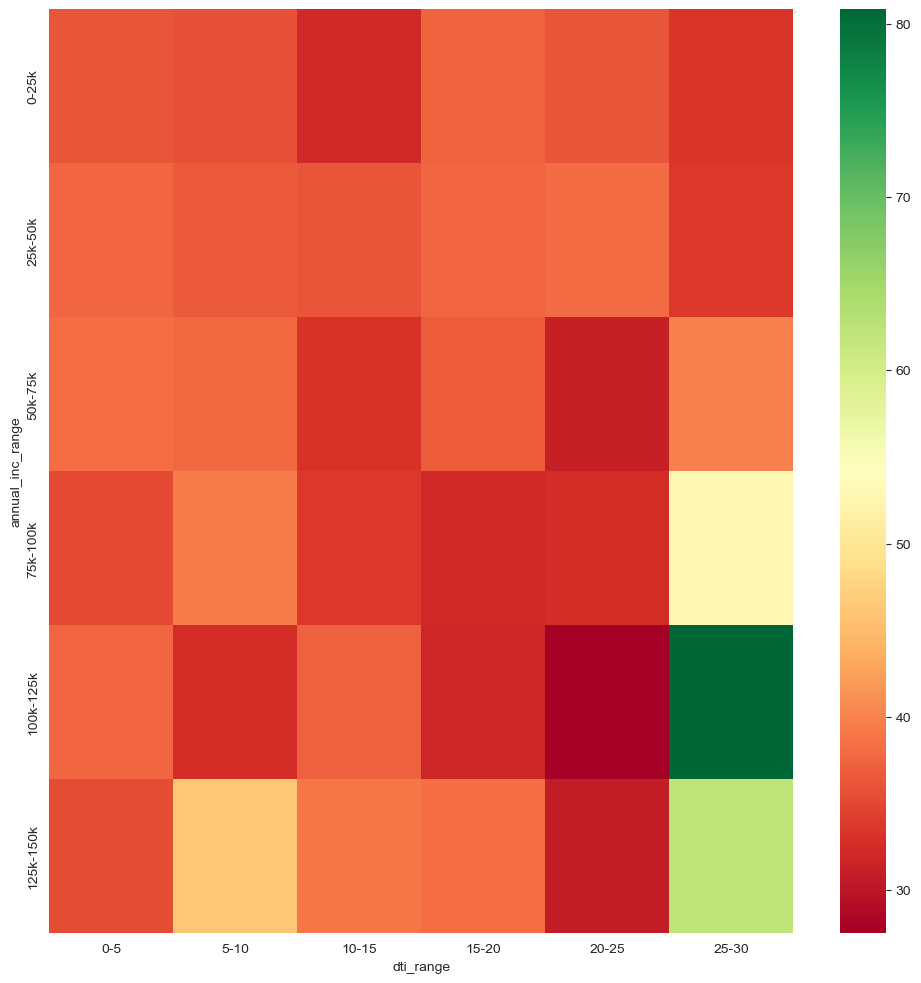

In [185]:
# Analysing effect of Annual Income and DTI Range on the Principal Recovery Ratio.
bivariate_analysis(loan_raw[loan_raw.loan_status == 'Charged Off'], 'prncp_recovery_ratio', 'annual_inc_range', 'dti_range')


**Minor Impact**

- Higher loan amount (above 15k)

- Applicant’s address state (NV, SD, AK, ID, NE)

- Higher debt to income ratio (above 15%)

- Credit utilization rate (above 50%)

**Major impact**

- Loan purpose (small business, renewable energy, educational)

- Loan Tenure ( 5 year loans tends to cause more defaults)

- Public bankruptcy records (1 or 2)

- Higher interest rate (above 20%)

- Loan grade & sub-grade (E, F, G)

- Higher DTI's affect the payment of Higher Loan Amounts